<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Supervised Learning - Random Forest - Diamonds
</b></font> </br></p>

---


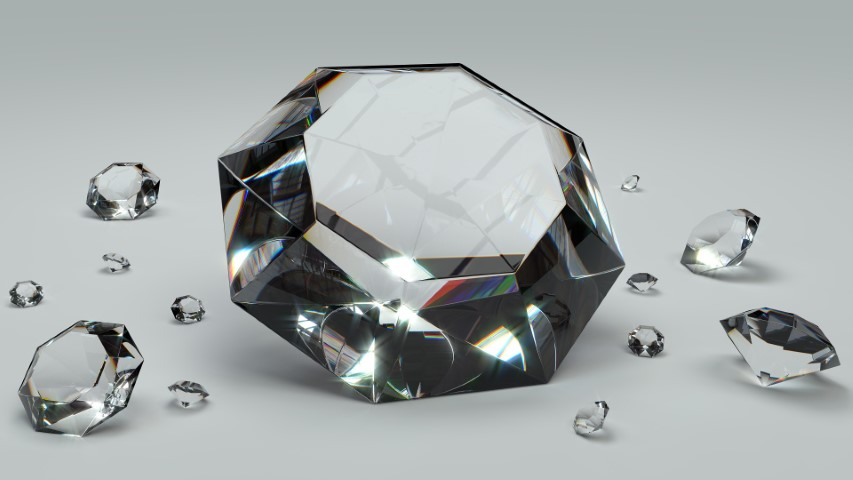

Bild von <a href="https://pixabay.com/de/users/colin00b-346653/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1186139">Colin Behrens</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1186139">Pixabay</a>

# **0  | Install & Import**
***

In [1]:
# Install

In [2]:
# Import
import pandas as pd
from pandas import read_csv, DataFrame

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.decomposition import PCA

import plotly.express as px
import plotly.subplots as sp

from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
from yellowbrick.model_selection import feature_importances

import joblib

In [3]:
# Warnung ausstellen
import warnings

warnings.filterwarnings("ignore")

# **1  | Understand**
***


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Aufgabe verstehen</br>
✅ Daten sammeln</br>
✅ Statistische Analyse (Min, Max, Mean, Korrelation, ...)</br>
✅ Datenvisualisierung (Streudiagramm, Box-Plot, ...)</br>
✅ Prepare Schritte festlegen</br>

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---

Dieser klassische Datensatz enthält die Preise und andere Attribute von fast 54.000 Diamanten.



[DataSet](https://www.openml.org/search?type=data&status=active&id=42225)

[Info](https://www.kaggle.com/datasets/shivam2503/diamonds)


In [4]:
df = read_csv(
    "https://raw.githubusercontent.com/ralf-42/ML_Intro/main/02%20data/diamonds.csv",
    usecols=[
        "carat",
        "cut",
        "color",
        "clarity",
        "depth",
        "table",
        "price",
        "x",
        "y",
        "z",
    ],
)

In [5]:
label = "price"
features = [n for n in df.columns if n != label]

target = df[label].copy()
data = df[features].copy()

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [8]:
data.groupby("cut").count()

,carat,color,clarity,depth,table,x,y,z
cut,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082


In [9]:
data.groupby("color").count()

,carat,cut,clarity,depth,table,x,y,z
color,,,,,,,,
D,6775,6775,6775,6775,6775,6775,6775,6775
E,9797,9797,9797,9797,9797,9797,9797,9797
F,9542,9542,9542,9542,9542,9542,9542,9542
G,11292,11292,11292,11292,11292,11292,11292,11292
H,8304,8304,8304,8304,8304,8304,8304,8304
I,5422,5422,5422,5422,5422,5422,5422,5422
J,2808,2808,2808,2808,2808,2808,2808,2808


<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Plotly
</font></p>

In [10]:
title_ = "Depth"
b1 = px.box(data["depth"], title=title_, width=600, height=600)

title_ = "Carat"
b2 = px.box(data["carat"], title=title_, width=600, height=600)

title_ = "Table"
b3 = px.box(data["table"], title=title_, width=600, height=600)

fig = sp.make_subplots(rows=1, cols=3, subplot_titles=("Depth", "Carat", "Table"))

for trace in b1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in b2.data:
    fig.add_trace(trace, row=1, col=2)

for trace in b3.data:
    fig.add_trace(trace, row=1, col=3)

# Layout anpassen
fig.update_layout(width=1000, height=500, title_text="Box-Plots")

# Plot anzeigen
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# **2 |  Prepare**

---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Nicht benötigte Features löschen</br>
✅ Datentyp ermitteln/ändern</br>
✅ Duplikate ermitteln/löschen</br>
✅ Missing Values behandeln</br>
✅ Ausreißer behandeln</br>
✅ Kategorischer Features codieren</br>
✅ Numerischer Features skalieren</br>
✅ Feature-Engineering (neue Features schaffen)</br>
✅ Dimensionalität reduzieren</br>
✅ Resampling (Over-/Undersampling)</br>
✅ Pipeline erstellen/konfigurieren</br>
✅ Train-Test-Split durchführen</br>

<p><font color='black' size="5">
Datentyp ermitteln
</font></p>

In [11]:
all_col = data.columns
num_col = data.select_dtypes(include="number").columns
cat_col = data.select_dtypes(exclude="number").columns

<p><font color='black' size="5">
Codierung
</font></p>

In [12]:
cat_seq = [
    ["Fair", "Good", "Very Good", "Premium", "Ideal"],
    ["J", "I", "H", "G", "F", "E", "D"],
    ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"],
]
data[cat_col] = OrdinalEncoder(categories=cat_seq).fit_transform(data[cat_col])

<p><font color='black' size="5">
Train-Test-Set
</font></p>


In [13]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, test_size=0.3, random_state=42
)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

((37758, 9), (16182, 9), (37758,), (16182,))

# **3 |  Modeling**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellauswahl treffen</br>
✅ Pipeline erweitern/konfigurieren</br>
✅ Training durchführen</br>
✅ Hyperparameter Tuning</br>
✅ Cross-Valdiation</br>
✅ Bootstrapping</br>
✅ Regularization</br>

 <p><font color='black' size="5">
Modellauswahl & Training
</font></p>

In [14]:
model = RandomForestRegressor()

In [15]:
model.fit(data_train, target_train)

RandomForestRegressor()

# **4 | Evaluate**
---


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Prognose (Train, Test) erstellen</br>
✅ Modellgüte prüfen</br>
✅ Residuenanalyse erstellen</br>
✅ Feature Importance/Selektion prüfen</br>
✅ Robustheitstest erstellen</br>
✅ Modellinterpretation erstellen</br>
✅ Sensitivitätsanalyse erstellen</br>
✅ Kommunikation (Key Takeaways)</br>


<p><font color='black' size="5">
Prediction
</font></p>


In [16]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)

<p><font color='black' size="5">
Bestimmtheitsmass
</font></p>

In [17]:
r2 = r2_score(target_train, target_train_pred)
print(f"Modell: {model} -- Train --- Bestimmtheitsmass: {r2:5.2f}")

Modell: RandomForestRegressor() -- Train --- Bestimmtheitsmass:  1.00


In [18]:
r2 = r2_score(target_test, target_test_pred)
print(f"Modell: {model} -- Test --- Bestimmtheitsmass: {r2:5.2f}")

Modell: RandomForestRegressor() -- Test --- Bestimmtheitsmass:  0.98


<p><font color='black' size="5">
Mean Absolut Error
</font></p>

In [19]:
mae = mean_absolute_error(target_test, target_test_pred)
print(f"Modell: {model} -- Test -- Mean Absolute Error: {mae:5.2f}")

Modell: RandomForestRegressor() -- Test -- Mean Absolute Error: 268.42


<p><font color='black' size="5">
Aufbau Analysewürfel
</font></p>

In [20]:
# Übernahme der Testdaten
cube = data_test.copy()
cube.reset_index(inplace=True)

# Übernahme Target real & predict
cube["real"] = DataFrame(target_test.values, columns=["real"])
cube["predict"] = DataFrame(target_test_pred, columns=["predict"])

In [21]:
# Erstellung 2D Features über Dimensionsreduktion PCA - unsupervised
pca = PCA(n_components=2)
pca = pca.fit_transform(data_test)
pca_df = DataFrame(pca)

# Cube um pca erweitern
cube["PCA1"] = pca_df[0]
cube["PCA2"] = pca_df[1]

<p><font color='black' size="5">
Visualisierung real vs predict
</font></p>

In [22]:
# Boxplot
title_ = "Boxplot real vs predict"
px.box(cube[["real", "predict"]], title=title_, width=600, height=600)

In [23]:
# Histogramm
title_ = "Histogramm Prices real vs predict"
fig = px.histogram(cube, x=["real", "predict"], nbins=10, title=title_)
fig.update_layout(barmode="group", bargap=0.2, width=800, height=600)
fig.show()

In [24]:
# 2 x Scatterplots
title_ = "Streupunktdiagramm real"
img1 = px.scatter(
    cube, x="PCA1", y="PCA2", color="real", title=title_, width=600, height=600
)

title_ = "Streupunktdiagramm predict"
img2 = px.scatter(
    cube, x="PCA1", y="PCA2", color="predict", title=title_, width=600, height=600
)

fig = sp.make_subplots(
    rows=1, cols=2, subplot_titles=("Scatterplot real", "Scatterplot predict")
)

for trace in img1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in img2.data:
    fig.add_trace(trace, row=1, col=2)

# Layout anpassen
fig.update_layout(width=1000, height=500, title_text="Vergleich real vs predict")

# Plot anzeigen
fig.show()

<p><font color='black' size="5">
Fehlerhafte Vorhersagen
</font></p>

In [25]:
cube["abs_Abw%"] = abs((cube["real"] - cube["predict"]) / cube["real"] * 100)
%precision 3
cube.head(10).style.format("{:,.1f}", subset=num_col)

,index,carat,cut,color,clarity,depth,table,x,y,z,real,predict,PCA1,PCA2,abs_Abw%
0,1388,0.2,4.000000,3.000000,6.000000,62.1,56.0,4.0,4.0,2.5,559,555.480000,-3.342795,1.868095,0.629696
1,50052,0.6,2.000000,4.000000,5.000000,60.0,57.0,5.4,5.4,3.3,2201,2370.170000,-0.717214,1.609831,7.686052
2,41645,0.4,4.000000,5.000000,5.000000,62.1,55.0,4.8,4.7,3.0,1238,1210.600000,-3.640683,1.310047,2.213247
3,42377,0.4,3.000000,5.000000,5.000000,60.8,57.0,4.9,4.9,3.0,1304,1200.130000,-1.472540,2.369265,7.965491
4,17244,1.6,4.000000,5.000000,1.000000,62.3,55.0,7.4,7.4,4.6,6901,9752.040000,-0.894298,-2.865671,41.313433
5,1608,1.0,0.000000,5.000000,1.000000,55.4,62.0,6.6,6.6,3.7,3011,4032.600000,6.337033,2.876408,33.928927
6,46398,0.5,4.000000,4.000000,4.000000,60.2,56.0,5.2,5.2,3.1,1765,1756.050000,-1.836349,0.933119,0.507082
7,45493,0.5,4.000000,6.000000,3.000000,62.0,56.0,5.2,5.2,3.2,1679,1795.890000,-2.062466,1.091957,6.961882
8,49385,0.6,3.000000,5.000000,3.000000,60.0,59.0,5.6,5.6,3.3,2102,2101.460000,1.286928,2.048048,0.025690
9,10460,1.1,4.000000,2.000000,2.000000,60.3,57.0,6.8,6.8,4.1,4789,5533.390000,0.723422,-1.948358,15.543746


In [26]:
cube.describe().T

,count,mean,std,min,25%,50%,75%,max
index,16182.0,2.684652e+04,15590.947396,1.000000,13290.750000,26962.000000,40279.750000,53936.000000
carat,16182.0,7.936856e-01,0.470375,0.200000,0.400000,0.700000,1.040000,4.010000
cut,16182.0,2.904833e+00,1.119779,0.000000,2.000000,3.000000,4.000000,4.000000
color,16182.0,3.408973e+00,1.702875,0.000000,2.000000,3.000000,5.000000,6.000000
clarity,16182.0,3.051106e+00,1.652282,0.000000,2.000000,3.000000,4.000000,7.000000
depth,16182.0,6.175986e+01,1.441881,43.000000,61.100000,61.900000,62.500000,79.000000
table,16182.0,5.744798e+01,2.252752,49.000000,56.000000,57.000000,59.000000,73.000000
x,16182.0,5.721311e+00,1.120562,0.000000,4.700000,5.690000,6.530000,10.140000
y,16182.0,5.724495e+00,1.131607,0.000000,4.710000,5.710000,6.530000,31.800000
z,16182.0,3.533092e+00,0.692098,0.000000,2.900000,3.520000,4.030000,6.310000


In [27]:
# Histogramm
title_ = "Histogramm absolute Abweichung"
fig = px.histogram(cube, x=["abs_Abw%"], nbins=20, title=title_)
fig.update_layout(barmode="group", bargap=0.2, width=800, height=600)
fig.show()

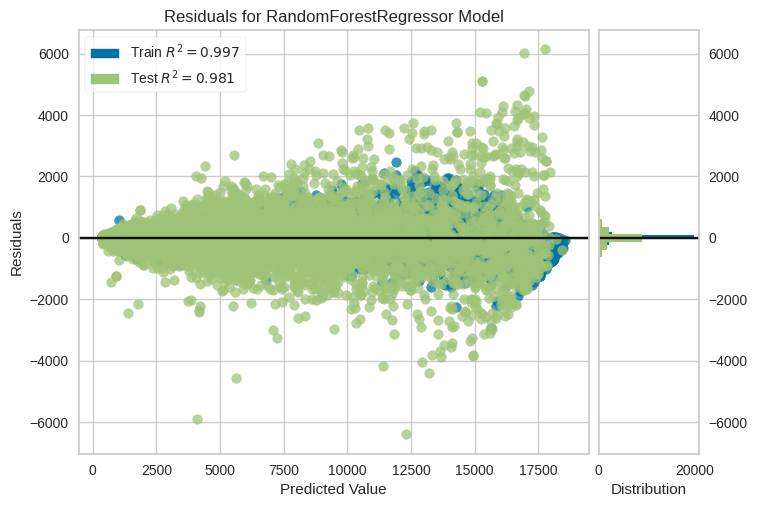

In [28]:
_ = residuals_plot(
    model,
    data_train,
    target_train,
    data_test,
    target_test,
    train_color="b",
    test_color="g",
)

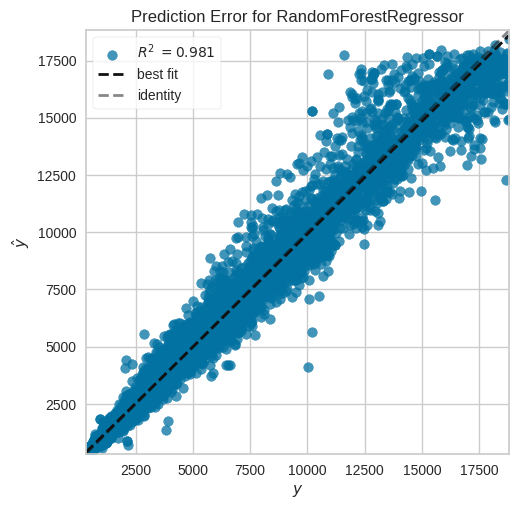

In [29]:
_ = prediction_error(model, data_train, target_train, data_test, target_test)


<p><font color='black' size="5">
Feature Importance
</font></p>

In [30]:
px.bar(
    x=model.feature_importances_, y=data.columns, width=1000, height=600
).update_yaxes(categoryorder="total ascending")

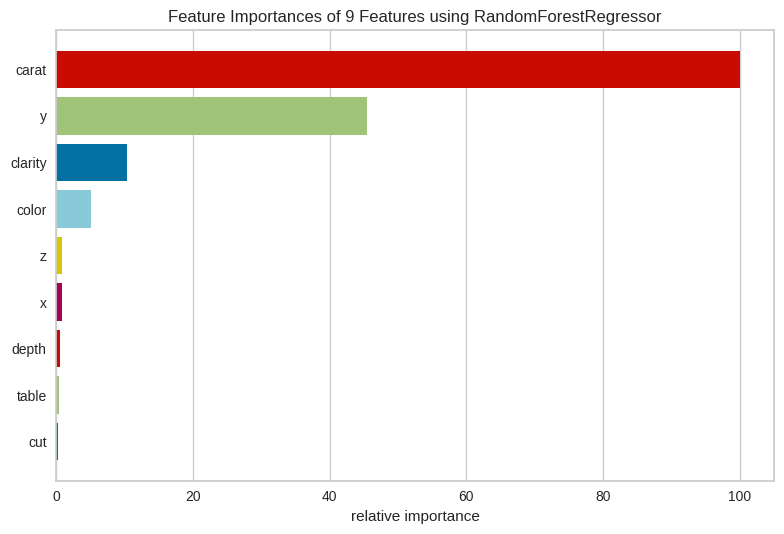

In [31]:
_ = feature_importances(model, data, target)

# **5 | Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>

<p><font size="5">
Save
</p>

In [32]:
# schnellste Variante
joblib.dump(model, "/content/diamonds-model.pkl")

['/content/diamonds-model.pkl']

<p><font color='black' size="5">
Load
</font></p>

In [34]:
import joblib

model_geladen = joblib.load("/content/diamonds-model.pkl")

<p><font size="5">
Prognose
</p>

In [36]:
target_pred = model_geladen.predict(data_test)
r2 = r2_score(target_test, target_pred)
print(f"Bestimmheitsmaß Testdaten: {r2:.2f}")

Bestimmheitsmaß Testdaten: 0.98


In [37]:
result = DataFrame()
result["real"] = target_test.values
result["pred"] = target_pred
result["%delta"] = (result["real"] - result["pred"]) / result["real"] * 100

In [38]:
pd.options.display.float_format = "{:.2f}".format
result

,real,pred,%delta
0,559,555.48,0.63
1,2201,2370.17,-7.69
2,1238,1210.60,2.21
3,1304,1200.13,7.97
4,6901,9752.04,-41.31
...,...,...,...
16177,705,750.59,-6.47
16178,5278,4732.18,10.34
16179,13157,12789.85,2.79
16180,2960,3215.84,-8.64
